#### Evaluate that customers with different income levels spend significantly more or less in the mall.


In [ ]:
# Import the file csv to get the columns Data and the pandas lib.
import pandas as pd

df=pd.read_csv('C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data_files/customer_arrivals_removed_outliers_.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/5530/OneDrive/Desktop/Mall_Customer_Segmentation/Data/customer_arrivals_removed_outliers_.csv'

In [ ]:
# import the function form the file 

import sys 
sys.path.append("..")

from Assumption_check import check_equal_variance,check_Normality

##### Changing the Annual Income form 15 k to 15000

In [ ]:
df['Annual Income'] = df['Annual Income (k$)']*1000

##### Visual representation of the Annual Income and the total spending

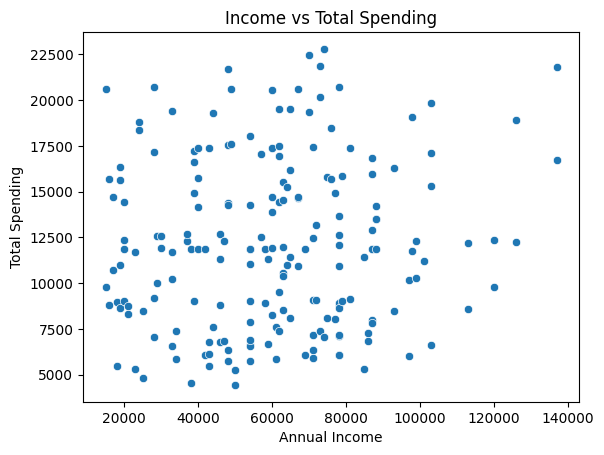

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Annual Income', y='Total Spending', data=df)
plt.title("Income vs Total Spending")
plt.show()


#### Checking the correlation btw them

In [ ]:
from scipy.stats import spearmanr,pearsonr

x=  df['Annual Income']
y=  df['Total Spending']

# Check normality of both variables first
check_Normality(x,Group_name="Annual Income")
check_Normality(y,Group_name="Total Spending")

Checking the normality of the Group Annual Income

Shapiro test result statisticcs:0.9773 , p-value:0.0030

 ❌ Not Likely normal distribution.
------------------------------------------------------------
Checking the normality of the Group Total Spending

Shapiro test result statisticcs:0.9607 , p-value:0.0000

 ❌ Not Likely normal distribution.
------------------------------------------------------------


#### Choosing which one to use according to situation
1. Both variable are Normal ->  	Pearson’s correlation
2. Not Normal               ->    Spearman’s rank correlation

##### In over situation there is no Normal Distribution 

In [ ]:
stats, p_val=spearmanr(x,y)
print(f"Pearson Correlation:\nCorrelation = {stats:.4f}, p = {p_val:.4f}")


Pearson Correlation:
Correlation = 0.0746, p = 0.2997


#### ρ = 0.2997 → There’s a weak positive monotonic relationship

 Business Insight :   Customers with higher income do tend to spend more, but the correlation is not very strong — suggesting that other factors (like membership, product types, or time spent) may also play a significant role.

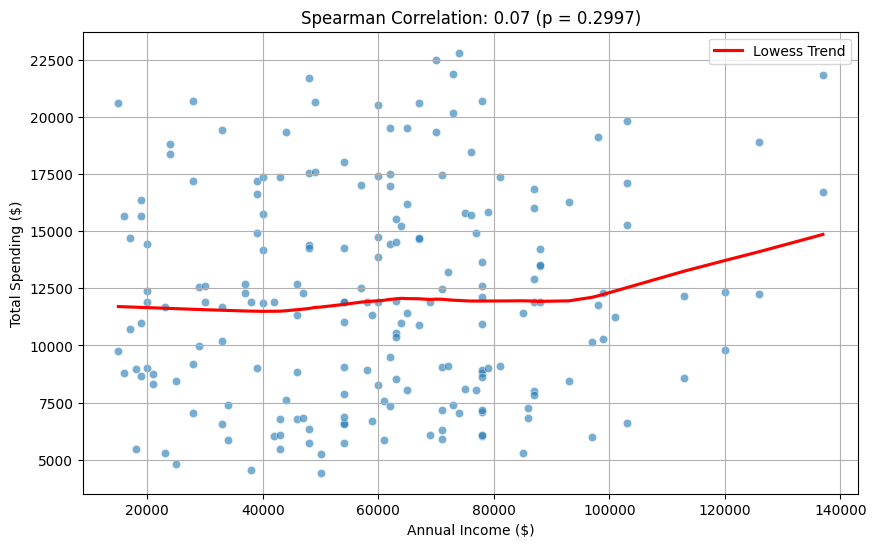

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.6)
sns.regplot(x=x, y=y, lowess=True, scatter=False, color='red', label='Lowess Trend')
plt.title(f"Spearman Correlation: {stats:.2f} (p = {p_val:.4f})")
plt.xlabel("Annual Income ($)")
plt.ylabel("Total Spending ($)")
plt.legend()
plt.grid(True)
plt.show()


In general, people with higher income tend to spend more, but the increase is not dramatic or strongly consistent